In [10]:
import pandas as pd
from sklearn.model_selection import KFold,StratifiedKFold
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pygad
from sklearn.tree import DecisionTreeClassifier

In [11]:
# read data
df = pd.read_csv('spambase.csv')

In [12]:
X = df.drop(columns=['spam']).to_numpy()
y = df['spam'].to_numpy()

In [13]:
# Create subsamples
fold_indexes = []
kf = StratifiedKFold(n_splits=46, random_state=None, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X,y)):
    fold_indexes.append(test_index)

In [14]:
print(len(fold_indexes[1]))

100


In [18]:
#Define the function to optimize (in this case, a simple binary problem)
X_temp = X[fold_indexes[1],:]
y_temp = y[fold_indexes[1]]

model =  xgb.XGBClassifier()

print(len(X_temp))
print(len(y_temp))

def loss(new_feature,sol_idx):
    X = np.hstack((X_temp,np.array([new_feature]).T))
    model.fit(X,y_temp)
    scores = cross_val_score(model, X, y_temp, cv=10, scoring='f1')
    return np.mean(scores)

100
100


In [19]:
# GA
fitness_function = loss

num_generations = 3
num_parents_mating = 4

sol_per_pop = 30
num_genes = len(y_temp)

init_range_low = 0
init_range_high = 2

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [20]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=int)

In [21]:
ga_instance.run()

In [22]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1]
Fitness value of the best solution = 0.8984126984126984


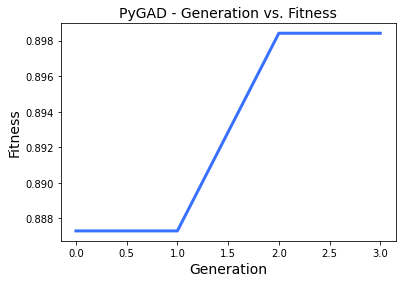

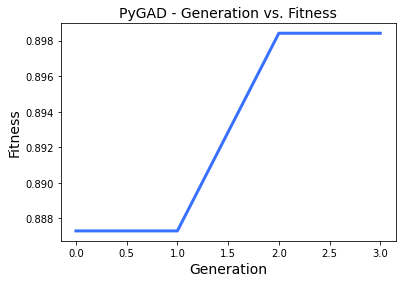

In [23]:
ga_instance.plot_fitness()

In [24]:
ga_instance.best_solutions_fitness

[0.8873015873015874,
 0.8873015873015874,
 0.8984126984126984,
 0.8984126984126984]

In [ ]:
feature = DecisionTreeClassifier(max_depth=3)
feature.fit(X_temp,solution)

In [ ]:
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
dot_data = tree.plot_tree(feature, 
                                feature_names=list(df.columns[:-1]),
                                class_names=['0','1'],
                                filled=True)

In [ ]:
# Add feature 
new_f = feature.predict(X.to_numpy())

In [ ]:
X = X.drop(columns='f1')

In [ ]:
new_X = X.copy()

In [ ]:
new_X['f1'] = new_f

In [ ]:
model1 =  xgb.XGBClassifier()
scores = cross_val_score(model1, X.to_numpy(), y.to_numpy(), cv=10, scoring='f1')
print(f'{np.mean(scores)} +- {np.std(scores)}')

In [ ]:
model2 =  xgb.XGBClassifier()
scores = cross_val_score(model2, new_X.to_numpy(), y.to_numpy(), cv=10, scoring='f1')
print(f'{np.mean(scores)} +- {np.std(scores)}')

In [ ]:
X.head()

In [ ]:
X_temp